In [7]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from hashcode.utils import load
from hashcode.state import GameState
plt.style.use('ggplot')

# os.chdir('..')
state: GameState = load(3)

/home/gt/hashcode-2021/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


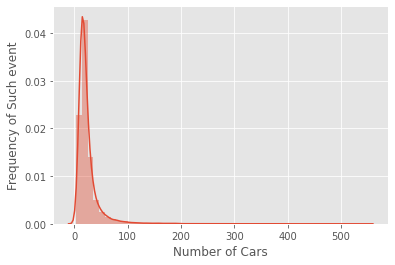

In [8]:
traffic = np.zeros(state.intersection_count)
for car in state.car_paths:
    for path in car:
        traffic[state.streets[path].end] += 1
sns.distplot(traffic)
plt.xlabel('Number of Cars arriving at an intersection')
plt.ylabel('Frequency of Such event')
plt.show()

/home/gt/hashcode-2021/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gt/hashcode-2021/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


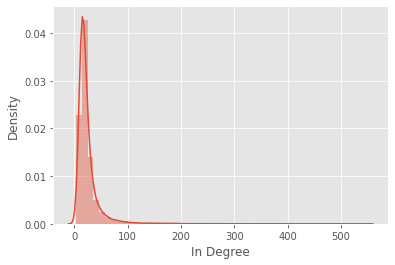

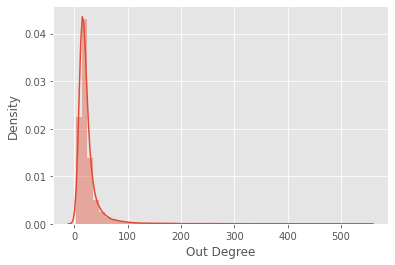

In [12]:
in_connections = np.zeros(state.intersection_count)
for car in state.car_paths:
    for path in car:
        in_connections[state.streets[path].end] += 1
sns.distplot(in_connections)
plt.xlabel('In Degree')

plt.show()
out_connections = np.zeros(state.intersection_count)
for car in state.car_paths:
    for path in car:
        out_connections[state.streets[path].start] += 1
sns.distplot(out_connections)
plt.xlabel('Out Degree')
plt.show()

Simulation Time: 8071


/home/gt/hashcode-2021/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


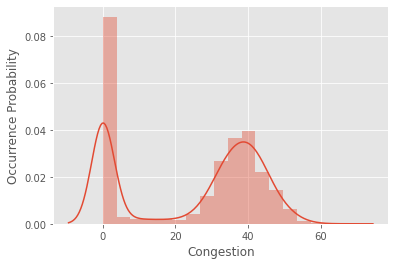

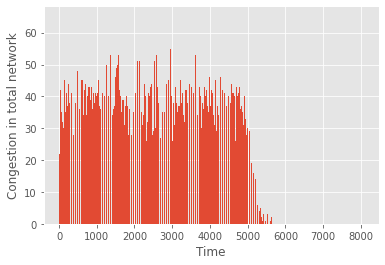

In [10]:
print("Simulation Time:", state.D)
discarded_cars = 0
hits = np.zeros(state.D)
for car in state.car_paths:
    time = 0
    for path in car[:-1]:
        time += state.streets[path].l
        if time < state.D:
            hits[time] += 1
sns.distplot(hits)
plt.xlabel('Congestion')
plt.ylabel('Occurrence Probability')
plt.show()

plt.bar(np.arange(len(hits)), hits)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()

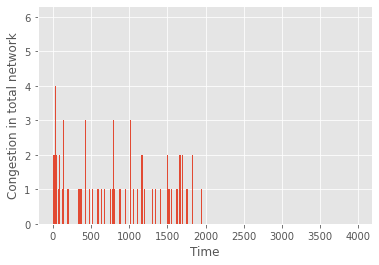

1


In [6]:
discarded_cars = 0
total_duration = np.zeros(state.D * 2)
for car in state.car_paths:
    time = 0
    for path in car:
        time += state.streets[path].l
    if time > state.D:
        discarded_cars += 1
    total_duration[time] += 1

plt.bar(np.arange(len(total_duration)), total_duration)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()
print(discarded_cars)


In [ ]:
discarded_cars = 0
total_duration = np.zeros(state.D * 2)
for car in state.car_paths:
    time = 0
    for path in car:
        time += state.streets[path].l
    if time > state.D:
        discarded_cars += 1
    total_duration[time] += 1

plt.bar(np.arange(len(total_duration)), total_duration)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()
print(discarded_cars)

In [ ]:
in_connections = np.zeros(len(state.intersection_mapping))
for car in state.car_paths:
    for path in car:
        in_connections[state.streets[path].end] += 1
sns.distplot(in_connections)
plt.xlabel('In Degree')

plt.show()
out_connections = np.zeros(len(state.intersection_mapping))
for car in state.car_paths:
    for path in car:
        out_connections[state.streets[path].start] += 1
sns.distplot(out_connections)
plt.xlabel('Out Degree')
plt.show()

In [ ]:
print("Simulation Time:", state.D)
discarded_cars = 0
hits = np.zeros(state.D)
for car in state.car_paths:
    time = 0
    for path in car[:-1]:
        time += state.streets[path].l
        if time < state.D:
            hits[time] += 1
sns.distplot(hits)
plt.xlabel('Congestion')
plt.ylabel('Occurrence Probability')
plt.show()

plt.bar(np.arange(len(hits)), hits)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()

In [ ]:
discarded_cars = 0
total_duration = np.zeros(state.D * 2)
for car in state.car_paths:
    time = 0
    for path in car:
        time += state.streets[path].l
    if time > state.D:
        discarded_cars += 1
    total_duration[time] += 1

plt.bar(np.arange(len(total_duration)), total_duration)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()
print(discarded_cars)

<AxesSubplot:>

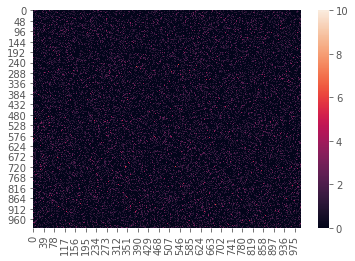

In [21]:
car_count = len(state.car_paths)
sets = [set(state.car_paths[i]) for i in range(car_count)]
corr_map = np.zeros((car_count, car_count), dtype=int)
count_intersections = np.zeros(11, dtype=int)
for i in range(car_count):
    for j in range(i + 1, car_count):
        weight = len(sets[i] & sets[j])
        corr_map[i][j] = corr_map[j][i] = weight
        count_intersections[weight] += 1

sns.heatmap(corr_map)

[342106 117174  31336   7193   1374    259     52      5      0      0
      1]


<BarContainer object of 11 artists>

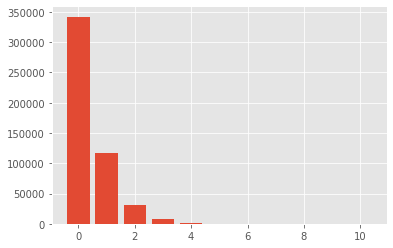

In [23]:
print(count_intersections)
plt.bar(list(range(len(count_intersections))), count_intersections)

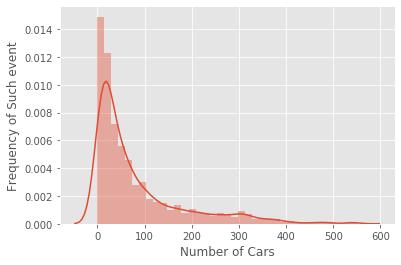

In [53]:
discarded_cars = 0
total_duration = np.zeros(state.D * 2)
for car in state.car_paths:
    time = 0
    for path in car:
        time += state.streets[path].l
    if time > state.D:
        discarded_cars += 1
    total_duration[time] += 1

plt.bar(np.arange(len(total_duration)), total_duration)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()
print(discarded_cars)

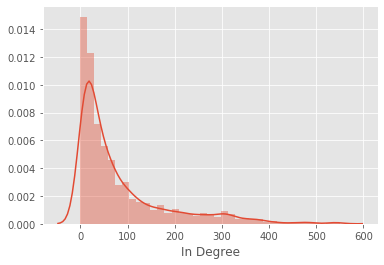

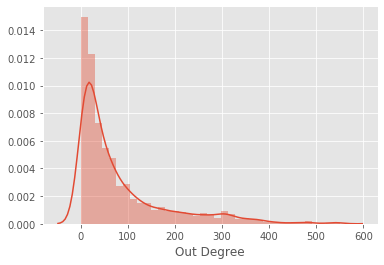

In [54]:
in_connections = np.zeros(len(state.intersection_mapping))
for car in state.car_paths:
    for path in car:
        in_connections[state.streets[path].end] += 1
sns.distplot(in_connections)
plt.xlabel('In Degree')

plt.show()
out_connections = np.zeros(len(state.intersection_mapping))
for car in state.car_paths:
    for path in car:
        out_connections[state.streets[path].start] += 1
sns.distplot(out_connections)
plt.xlabel('Out Degree')
plt.show()

Simulation Time: 1992


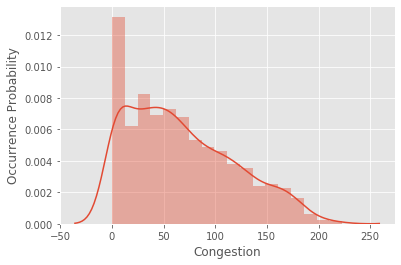

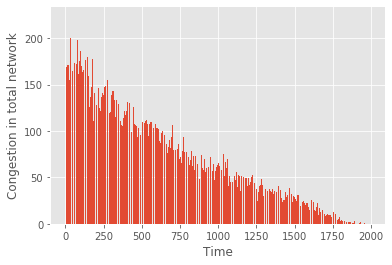

In [55]:
print("Simulation Time:", state.D)
discarded_cars = 0
hits = np.zeros(state.D)
for car in state.car_paths:
    time = 0
    for path in car[:-1]:
        time += state.streets[path].l
        if time < state.D:
            hits[time] += 1
sns.distplot(hits)
plt.xlabel('Congestion')
plt.ylabel('Occurrence Probability')
plt.show()

plt.bar(np.arange(len(hits)), hits)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()

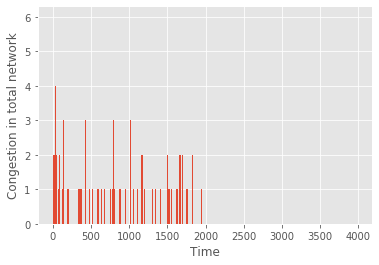

1


In [56]:
discarded_cars = 0
total_duration = np.zeros(state.D * 2)
for car in state.car_paths:
    time = 0
    for path in car:
        time += state.streets[path].l
    if time > state.D:
        discarded_cars += 1
    total_duration[time] += 1

plt.bar(np.arange(len(total_duration)), total_duration)
plt.xlabel('Time')
plt.ylabel('Congestion in total network')
plt.show()
print(discarded_cars)